$$\text{Applied Machine Learning in Python}$$
$$\text{week 3}$$

* Data manipulation:
    * Dealing with missing data
* Cross validation
    * k-fold
    * stratified k-fold
    * shuffle split
    * leave-one-out
    * cross-validated estimations
* Hyperparameter tuning
* Clustering
    * k-means

$$\text{Dealing with missing data}$$

In [2]:
# import standardt packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [370]:
# a toy example: a matrix with random numbers [0,1]
df = pd.DataFrame(data=np.random.random(size=(10,5)))
print df

          0         1         2         3         4
0  0.160503  0.637183  0.930847  0.692308  0.106555
1  0.759897  0.165852  0.122290  0.274892  0.699195
2  0.412419  0.238659  0.280613  0.999235  0.576935
3  0.395303  0.841661  0.435037  0.239648  0.696212
4  0.654373  0.266354  0.032148  0.062761  0.226631
5  0.291823  0.931863  0.406121  0.381058  0.302127
6  0.500698  0.624434  0.380994  0.585348  0.364310
7  0.298716  0.830196  0.516957  0.662584  0.081411
8  0.965206  0.569419  0.802927  0.147528  0.755430
9  0.566639  0.258162  0.114851  0.973690  0.387938


In [371]:
# insert at random NaN values
df = df.where(df > 0.15, np.nan)
print df

          0         1         2         3         4
0  0.160503  0.637183  0.930847  0.692308       NaN
1  0.759897  0.165852       NaN  0.274892  0.699195
2  0.412419  0.238659  0.280613  0.999235  0.576935
3  0.395303  0.841661  0.435037  0.239648  0.696212
4  0.654373  0.266354       NaN       NaN  0.226631
5  0.291823  0.931863  0.406121  0.381058  0.302127
6  0.500698  0.624434  0.380994  0.585348  0.364310
7  0.298716  0.830196  0.516957  0.662584       NaN
8  0.965206  0.569419  0.802927       NaN  0.755430
9  0.566639  0.258162       NaN  0.973690  0.387938


**Dropping missing values**

In [88]:
print df

          0         1         2         3         4
0  0.800691  0.472139       NaN  0.733852  0.813766
1  0.183815  0.294306  0.493352  0.324987  0.651657
2  0.901042  0.957655  0.816292  0.184427  0.719156
3  0.987391  0.768411  0.622412  0.791472  0.486619
4  0.669426  0.803533       NaN  0.980861  0.676303
5  0.365420  0.670573  0.481768  0.443173  0.799171
6       NaN  0.777588  0.725853  0.826586  0.358428
7  0.463424  0.890354  0.834754  0.611895  0.646247
8  0.555269       NaN  0.422035  0.318982  0.318686
9  0.447454  0.780913  0.232471  0.713247  0.354301


In [89]:
# drop all rows with missing numbers:
print df.dropna(axis=0)

          0         1         2         3         4
1  0.183815  0.294306  0.493352  0.324987  0.651657
2  0.901042  0.957655  0.816292  0.184427  0.719156
3  0.987391  0.768411  0.622412  0.791472  0.486619
5  0.365420  0.670573  0.481768  0.443173  0.799171
7  0.463424  0.890354  0.834754  0.611895  0.646247
9  0.447454  0.780913  0.232471  0.713247  0.354301


In [86]:
print df

          0         1         2         3         4
0  0.800691  0.472139       NaN  0.733852  0.813766
1  0.183815  0.294306  0.493352  0.324987  0.651657
2  0.901042  0.957655  0.816292  0.184427  0.719156
3  0.987391  0.768411  0.622412  0.791472  0.486619
4  0.669426  0.803533       NaN  0.980861  0.676303
5  0.365420  0.670573  0.481768  0.443173  0.799171
6       NaN  0.777588  0.725853  0.826586  0.358428
7  0.463424  0.890354  0.834754  0.611895  0.646247
8  0.555269       NaN  0.422035  0.318982  0.318686
9  0.447454  0.780913  0.232471  0.713247  0.354301


In [87]:
# drop all columns with missing numbers:
print df.dropna(axis=1)

          3         4
0  0.733852  0.813766
1  0.324987  0.651657
2  0.184427  0.719156
3  0.791472  0.486619
4  0.980861  0.676303
5  0.443173  0.799171
6  0.826586  0.358428
7  0.611895  0.646247
8  0.318982  0.318686
9  0.713247  0.354301


In [90]:
# only drop rows where all values are missing
# new dataframe
df_all_miss = df.copy()
df_all_miss.iloc[-1,:] = np.nan
print df_all_miss

          0         1         2         3         4
0  0.800691  0.472139       NaN  0.733852  0.813766
1  0.183815  0.294306  0.493352  0.324987  0.651657
2  0.901042  0.957655  0.816292  0.184427  0.719156
3  0.987391  0.768411  0.622412  0.791472  0.486619
4  0.669426  0.803533       NaN  0.980861  0.676303
5  0.365420  0.670573  0.481768  0.443173  0.799171
6       NaN  0.777588  0.725853  0.826586  0.358428
7  0.463424  0.890354  0.834754  0.611895  0.646247
8  0.555269       NaN  0.422035  0.318982  0.318686
9       NaN       NaN       NaN       NaN       NaN


In [91]:
print df_all_miss.dropna(how='all')

          0         1         2         3         4
0  0.800691  0.472139       NaN  0.733852  0.813766
1  0.183815  0.294306  0.493352  0.324987  0.651657
2  0.901042  0.957655  0.816292  0.184427  0.719156
3  0.987391  0.768411  0.622412  0.791472  0.486619
4  0.669426  0.803533       NaN  0.980861  0.676303
5  0.365420  0.670573  0.481768  0.443173  0.799171
6       NaN  0.777588  0.725853  0.826586  0.358428
7  0.463424  0.890354  0.834754  0.611895  0.646247
8  0.555269       NaN  0.422035  0.318982  0.318686


In [372]:
df_thresh = df.where(df > 0.4, np.nan)
print df_thresh

          0         1         2         3         4
0       NaN  0.637183  0.930847  0.692308       NaN
1  0.759897       NaN       NaN       NaN  0.699195
2  0.412419       NaN       NaN  0.999235  0.576935
3       NaN  0.841661  0.435037       NaN  0.696212
4  0.654373       NaN       NaN       NaN       NaN
5       NaN  0.931863  0.406121       NaN       NaN
6  0.500698  0.624434       NaN  0.585348       NaN
7       NaN  0.830196  0.516957  0.662584       NaN
8  0.965206  0.569419  0.802927       NaN  0.755430
9  0.566639       NaN       NaN  0.973690       NaN


In [373]:
# keep only the rows with at least 3 non-NaN values
print df_thresh.dropna(thresh=3)

          0         1         2         3         4
0       NaN  0.637183  0.930847  0.692308       NaN
2  0.412419       NaN       NaN  0.999235  0.576935
3       NaN  0.841661  0.435037       NaN  0.696212
6  0.500698  0.624434       NaN  0.585348       NaN
7       NaN  0.830196  0.516957  0.662584       NaN
8  0.965206  0.569419  0.802927       NaN  0.755430


In [94]:
# only drop if a specific column contains NaN
print df

          0         1         2         3         4
0  0.800691  0.472139       NaN  0.733852  0.813766
1  0.183815  0.294306  0.493352  0.324987  0.651657
2  0.901042  0.957655  0.816292  0.184427  0.719156
3  0.987391  0.768411  0.622412  0.791472  0.486619
4  0.669426  0.803533       NaN  0.980861  0.676303
5  0.365420  0.670573  0.481768  0.443173  0.799171
6       NaN  0.777588  0.725853  0.826586  0.358428
7  0.463424  0.890354  0.834754  0.611895  0.646247
8  0.555269       NaN  0.422035  0.318982  0.318686
9  0.447454  0.780913  0.232471  0.713247  0.354301


In [97]:
print df.dropna(subset=[1])

          0         1         2         3         4
0  0.800691  0.472139       NaN  0.733852  0.813766
1  0.183815  0.294306  0.493352  0.324987  0.651657
2  0.901042  0.957655  0.816292  0.184427  0.719156
3  0.987391  0.768411  0.622412  0.791472  0.486619
4  0.669426  0.803533       NaN  0.980861  0.676303
5  0.365420  0.670573  0.481768  0.443173  0.799171
6       NaN  0.777588  0.725853  0.826586  0.358428
7  0.463424  0.890354  0.834754  0.611895  0.646247
9  0.447454  0.780913  0.232471  0.713247  0.354301


**Imputing missing values**

In [98]:
# imputing with scalar values
print df

          0         1         2         3         4
0  0.800691  0.472139       NaN  0.733852  0.813766
1  0.183815  0.294306  0.493352  0.324987  0.651657
2  0.901042  0.957655  0.816292  0.184427  0.719156
3  0.987391  0.768411  0.622412  0.791472  0.486619
4  0.669426  0.803533       NaN  0.980861  0.676303
5  0.365420  0.670573  0.481768  0.443173  0.799171
6       NaN  0.777588  0.725853  0.826586  0.358428
7  0.463424  0.890354  0.834754  0.611895  0.646247
8  0.555269       NaN  0.422035  0.318982  0.318686
9  0.447454  0.780913  0.232471  0.713247  0.354301


In [454]:
print df.fillna(0)

          0         1         2         3         4
0  0.160503  0.637183  0.930847  0.692308  0.000000
1  0.759897  0.165852  0.000000  0.274892  0.699195
2  0.412419  0.238659  0.280613  0.999235  0.576935
3  0.395303  0.841661  0.435037  0.239648  0.696212
4  0.654373  0.266354  0.000000  0.000000  0.226631
5  0.291823  0.931863  0.406121  0.381058  0.302127
6  0.500698  0.624434  0.380994  0.585348  0.364310
7  0.298716  0.830196  0.516957  0.662584  0.000000
8  0.965206  0.569419  0.802927  0.000000  0.755430
9  0.566639  0.258162  0.000000  0.973690  0.387938


In [100]:
# fill gaps forward or backward (propagate values)
print df

          0         1         2         3         4
0  0.800691  0.472139       NaN  0.733852  0.813766
1  0.183815  0.294306  0.493352  0.324987  0.651657
2  0.901042  0.957655  0.816292  0.184427  0.719156
3  0.987391  0.768411  0.622412  0.791472  0.486619
4  0.669426  0.803533       NaN  0.980861  0.676303
5  0.365420  0.670573  0.481768  0.443173  0.799171
6       NaN  0.777588  0.725853  0.826586  0.358428
7  0.463424  0.890354  0.834754  0.611895  0.646247
8  0.555269       NaN  0.422035  0.318982  0.318686
9  0.447454  0.780913  0.232471  0.713247  0.354301


In [103]:
# fill forward
print df.fillna(method='ffill')

          0         1         2         3         4
0  0.800691  0.472139       NaN  0.733852  0.813766
1  0.183815  0.294306  0.493352  0.324987  0.651657
2  0.901042  0.957655  0.816292  0.184427  0.719156
3  0.987391  0.768411  0.622412  0.791472  0.486619
4  0.669426  0.803533  0.622412  0.980861  0.676303
5  0.365420  0.670573  0.481768  0.443173  0.799171
6  0.365420  0.777588  0.725853  0.826586  0.358428
7  0.463424  0.890354  0.834754  0.611895  0.646247
8  0.555269  0.890354  0.422035  0.318982  0.318686
9  0.447454  0.780913  0.232471  0.713247  0.354301


In [104]:
print df

          0         1         2         3         4
0  0.800691  0.472139       NaN  0.733852  0.813766
1  0.183815  0.294306  0.493352  0.324987  0.651657
2  0.901042  0.957655  0.816292  0.184427  0.719156
3  0.987391  0.768411  0.622412  0.791472  0.486619
4  0.669426  0.803533       NaN  0.980861  0.676303
5  0.365420  0.670573  0.481768  0.443173  0.799171
6       NaN  0.777588  0.725853  0.826586  0.358428
7  0.463424  0.890354  0.834754  0.611895  0.646247
8  0.555269       NaN  0.422035  0.318982  0.318686
9  0.447454  0.780913  0.232471  0.713247  0.354301


In [105]:
print df.fillna(method='bfill')

          0         1         2         3         4
0  0.800691  0.472139  0.493352  0.733852  0.813766
1  0.183815  0.294306  0.493352  0.324987  0.651657
2  0.901042  0.957655  0.816292  0.184427  0.719156
3  0.987391  0.768411  0.622412  0.791472  0.486619
4  0.669426  0.803533  0.481768  0.980861  0.676303
5  0.365420  0.670573  0.481768  0.443173  0.799171
6  0.463424  0.777588  0.725853  0.826586  0.358428
7  0.463424  0.890354  0.834754  0.611895  0.646247
8  0.555269  0.780913  0.422035  0.318982  0.318686
9  0.447454  0.780913  0.232471  0.713247  0.354301


$$\textbf{Cross validation}$$

**Cross-validation** is a model validation technique for assessing how the results of a statistical analysis will generalise to an independent data set.

One round of cross-validation involves partitioning a sample of data into complementary subsets, performing the analysis on one subset (called the _training_ set), and validating the analysis on the other subset (called the _testing_ set). To reduce variability, in most methods multiple rounds of cross-validation are performed using different partitions, and the validation results are combined (e.g. averaged) over the rounds to estimate a final predictive model.

Cross-validation combines (averages) measures of fit (prediction error) to derive a more accurate estimate of model prediction performance.

$$\textbf{Cross validation iterators}$$

Assuming that some data is **Independent** and **Identically Distributed** (i.i.d.) is making the assumption that all samples stem from the same generative process and that the generative process is assumed to have no memory of past generated samples.

**k-fold** cross validation (k=5)

<img src="plots/k_fold.png"  align="center" style="width: 1600px;"/>

In [108]:
# import k-fold CV algorithm
from sklearn.model_selection import KFold

In [123]:
# create a dummy list of indices
x = np.arange(1,16)

In [378]:
# initialise the iterator with 5 splits 
kf = KFold(n_splits=5)

In [379]:
# print CV partitionigs
for train_indx, test_indx in kf.split(x):
    print x[train_indx], x[test_indx]

[ 4  5  6  7  8  9 10 11 12 13 14 15] [1 2 3]
[ 1  2  3  7  8  9 10 11 12 13 14 15] [4 5 6]
[ 1  2  3  4  5  6 10 11 12 13 14 15] [7 8 9]
[ 1  2  3  4  5  6  7  8  9 13 14 15] [10 11 12]
[ 1  2  3  4  5  6  7  8  9 10 11 12] [13 14 15]


In [128]:
# introducing some randomness in splitting
kf = KFold(n_splits=5,random_state=1, shuffle=True)

<img src="plots/k_fold_rnd.png"  align="center" style="width: 1600px;"/>

In [134]:
for train_indx, test_indx in kf.split(x):
    print x[train_indx], x[test_indx]

[ 1  2  3  5  6  9 10 11 12 13 14 15] [4 7 8]
[ 1  2  4  6  7  8  9 10 12 13 14 15] [ 3  5 11]
[ 3  4  5  6  7  8  9 10 11 12 13 15] [ 1  2 14]
[ 1  2  3  4  5  6  7  8 11 12 13 14] [ 9 10 15]
[ 1  2  3  4  5  7  8  9 10 11 14 15] [ 6 12 13]


**Repeated** k-fold cross validation

In [131]:
# import repeated k-fold
from sklearn.model_selection import RepeatedKFold

In [170]:
# initialise with 5 splits and repeat 3 times
rkf = RepeatedKFold(n_splits=5, n_repeats=3)

In [159]:
for train_indx, test_indx in rkf.split(x):
    print x[train_indx], x[test_indx]

[ 1  3  4  5  6  7  9 10 11 12 14 15] [ 2  8 13]
[ 1  2  3  4  5  6  8 11 12 13 14 15] [ 7  9 10]
[ 1  2  3  4  5  6  7  8  9 10 13 15] [11 12 14]
[ 1  2  5  6  7  8  9 10 11 12 13 14] [ 3  4 15]
[ 2  3  4  7  8  9 10 11 12 13 14 15] [1 5 6]
[ 1  2  3  4  5  6  7 10 11 12 13 15] [ 8  9 14]
[ 1  2  4  5  6  8  9 10 11 13 14 15] [ 3  7 12]
[ 2  3  4  5  6  7  8  9 10 12 13 14] [ 1 11 15]
[ 1  3  4  6  7  8  9 10 11 12 14 15] [ 2  5 13]
[ 1  2  3  5  7  8  9 11 12 13 14 15] [ 4  6 10]
[ 2  3  4  7  8  9 10 11 12 13 14 15] [1 5 6]
[ 1  2  3  5  6  7  8  9 10 11 12 14] [ 4 13 15]
[ 1  2  3  4  5  6  9 10 11 12 13 15] [ 7  8 14]
[ 1  2  3  4  5  6  7  8  9 13 14 15] [10 11 12]
[ 1  4  5  6  7  8 10 11 12 13 14 15] [2 3 9]


**Shuffle** cross validation

In [135]:
# import shuffle iterator
from sklearn.model_selection import ShuffleSplit

In [142]:
# Random permutation of all data + split (1-X)% and X%, where X is in range [0.0, 1.0]
shs = ShuffleSplit(n_splits=5, test_size=0.3)

In [380]:
for train_indx, test_indx in shs.split(x):
    print x[train_indx], x[test_indx]

[15  4 12 11  3  2  9 10  5  6] [ 8  7 14  1 13]
[14  7  6  4 10  3  1  2 13 11] [15 12  9  8  5]
[ 9  6 14  4  2  5 15  3  8 13] [10 11  7 12  1]
[ 6  1  8  2  9 11  5 15  3 13] [14 10  7 12  4]
[ 3 11 12 14 13 15  8 10  2  5] [7 6 9 4 1]


**Stratified k-fold** cross validation

This cross-validation object is a variation of KFold that returns **stratified** folds. The folds are made by **preserving the percentage of samples for each class**.

In [145]:
# import stratified iterator
from sklearn.model_selection import StratifiedKFold

In [381]:
# initialise with 5 splits
skf = StratifiedKFold(n_splits=3)

In [382]:
# create data with imbalanced class labels
y = np.random.choice([0, 1], size=(15,), p=[1./3, 2./3])
y

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1])

In [383]:
for train_indx, test_indx in skf.split(x,y):
    print x[train_indx], x[test_indx], y[train_indx], y[test_indx]

[ 6  7  9 10 11 12 13 14 15] [1 2 3 4 5 8] [1 1 1 0 1 1 1 0 1] [0 1 1 1 1 0]
[ 1  2  3  4  5  8 12 13 14 15] [ 6  7  9 10 11] [0 1 1 1 1 0 1 1 0 1] [1 1 1 0 1]
[ 1  2  3  4  5  6  7  8  9 10 11] [12 13 14 15] [0 1 1 1 1 1 1 0 1 0 1] [1 1 0 1]


**Leave-One-Out** cross validation iterator

In [172]:
# import
from sklearn.model_selection import LeaveOneOut

In [176]:
# initialise. Note, it does NOT have the argument 'n_split', as it uses ALL data
loocv = LeaveOneOut()

In [177]:
for train_indx, test_indx in loocv.split(x):
    print x[train_indx], x[test_indx]

[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15] [1]
[ 1  3  4  5  6  7  8  9 10 11 12 13 14 15] [2]
[ 1  2  4  5  6  7  8  9 10 11 12 13 14 15] [3]
[ 1  2  3  5  6  7  8  9 10 11 12 13 14 15] [4]
[ 1  2  3  4  6  7  8  9 10 11 12 13 14 15] [5]
[ 1  2  3  4  5  7  8  9 10 11 12 13 14 15] [6]
[ 1  2  3  4  5  6  8  9 10 11 12 13 14 15] [7]
[ 1  2  3  4  5  6  7  9 10 11 12 13 14 15] [8]
[ 1  2  3  4  5  6  7  8 10 11 12 13 14 15] [9]
[ 1  2  3  4  5  6  7  8  9 11 12 13 14 15] [10]
[ 1  2  3  4  5  6  7  8  9 10 12 13 14 15] [11]
[ 1  2  3  4  5  6  7  8  9 10 11 13 14 15] [12]
[ 1  2  3  4  5  6  7  8  9 10 11 12 14 15] [13]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 15] [14]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14] [15]


$$\textbf{Cross-validated model evalution}$$

To get **a better measure** of prediction accuracy (which we can use as a proxy for goodness of fit of the model), we can successively split the data **in folds** 

**Cross validated estimation**

In [387]:
# iris data set
from sklearn import datasets
iris_data = datasets.load_iris()
X, y = iris_data.data, iris_data.target

In [388]:
# importing cross validation estimators
from sklearn.model_selection import cross_val_score, cross_val_predict

In [389]:
# import classifiers
from sklearn import linear_model
from sklearn import neighbors
# define classifiers
clf_logit = linear_model.LogisticRegression()
clf_knghb = neighbors.KNeighborsClassifier(n_neighbors=10)

In [459]:
# use k-fold cv iterator and 'accuracy' score to get 'k' evaluations 
# check cases: k-folds = [2, 3, 4, 5, 6, 10, 15]
cv_metrics_k = cross_val_score(estimator=clf_logit, 
                               X=X, y=y, 
                               cv=KFold(n_splits=100), 
                               scoring='accuracy')
print cv_metrics_k
print cv_metrics_k.mean()

[ 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
  1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
  1.   1.   1.   0.5  1.   0.5  1.   1.   1.   1.   1.   0.5  0.   1.   1.
  1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
  1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
  1.   1.   1.   1.   0.   1.   1.   1.   0.   1.   1.   1.   1.   1.   1.
  1.   1.   1.   1.   1.   1.   1.   1.   1.   1. ]
0.955


In [460]:
# use Stratified k-fold cv iterator and 'accuracy' score to get 'k' evaluations 
cv_metrics_stratif = cross_val_score(estimator=clf_logit, 
                                     X=X, y=y, 
                                     cv=StratifiedKFold(n_splits=5), 
                                     scoring='accuracy')
print cv_metrics_stratif
print cv_metrics_stratif.mean()

[ 1.          0.96666667  0.93333333  0.9         1.        ]
0.96


In [412]:
# use leave-one-ou iterator and 'accuracy' score 
cv_metrics_loocv = cross_val_score(estimator=clf_logit, 
                                   X=X, y=y, 
                                   cv=LeaveOneOut(), 
                                   scoring='accuracy')
print cv_metrics_loocv
print cv_metrics_loocv.mean()

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.  1.  1.  1.  0.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.  0.  0.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  0.  1.  1.  1.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.]
0.953333333333


$$\textbf{Model comparison}$$

How to compare different models/algorithms?

Fix randomness and evaluate performance (compute metric) on the same fold:

In [440]:
# get cv evaluation with logistic regression:
cv_logit_acc = cross_val_score(estimator=linear_model.LogisticRegression(), 
                               X=X, y=y, 
                               cv=StratifiedKFold(n_splits=10, random_state=0))
# print cv_results
print 'cv results:  ' + str(cv_logit_acc)
print ' '
print 'mean (+/-std) %.2f'% cv_logit_acc.mean() + ' (+/- %.2f '% cv_logit_acc.std() + ')'

cv results:  [ 1.          1.          1.          0.93333333  0.93333333  0.93333333
  0.8         0.93333333  1.          1.        ]
 
mean (+/-std) 0.95 (+/- 0.06 )


In [441]:
# get cv evaluation with k-neighbours:
cv_kneigh_acc = cross_val_score(estimator=neighbors.KNeighborsClassifier(n_neighbors=20), 
                                X=X, y=y, 
                                cv=StratifiedKFold(n_splits=10, random_state=0))
# print cv_results
print 'cv results:  ' + str(cv_kneigh_acc)
print ' '
print 'mean (+/-std) %.2f'% cv_kneigh_acc.mean() + ' (+/- %.2f '% cv_kneigh_acc.std() + ')'

cv results:  [ 1.          0.93333333  1.          1.          1.          0.93333333
  0.93333333  1.          1.          1.        ]
 
mean (+/-std) 0.98 (+/- 0.03 )


$$\textbf{Hyperparameter Tuning}$$

In machine learning, **a hyperparameter** is a parameter whose value is set before the learning process begins. By contrast, the values of other **parameters** are derived via training.

For example, k-neighbours classification algorithm

In [339]:
# import k-neightbours
from sklearn import neighbors
# initialise the classifier
k_nghb = neighbors.KNeighborsClassifier(n_neighbors=2)
# get data
X, y = iris_data.data, iris_data.target

In [463]:
# run the classifier with n = 2
acc_2 = cross_val_score(estimator=neighbors.KNeighborsClassifier(n_neighbors=23), 
                        X=X, y=y, 
                        cv=StratifiedKFold(n_splits=10))

In [464]:
# print results
acc_2

array([ 0.93333333,  0.93333333,  1.        ,  1.        ,  1.        ,
        0.93333333,  0.93333333,  1.        ,  1.        ,  1.        ])

In [340]:
acc_2.mean()

0.95333333333333337

Let's check the performance for different numbers of 'n_neighbors'

In [354]:
# specify a list of k-neighbours (hyperparameter)
k_grid = [1,2,3,5,10,15,20,25,30,50]

In [366]:
results = []
for k_i in k_grid:
    tmp_acc = cross_val_score(estimator=neighbors.KNeighborsClassifier(n_neighbors=k_i), 
                        X=X, y=y, 
                        cv=StratifiedKFold(n_splits=10))
    mean_accuracy_i = tmp_acc.mean()
    print 'accuracy with : ' + str(k_i) + ' neighbours: ' + str(mean_accuracy_i)
    results.append(mean_accuracy_i)

accuracy with : 1 neighbours: 0.96
accuracy with : 2 neighbours: 0.953333333333
accuracy with : 3 neighbours: 0.966666666667
accuracy with : 5 neighbours: 0.966666666667
accuracy with : 10 neighbours: 0.966666666667
accuracy with : 15 neighbours: 0.973333333333
accuracy with : 20 neighbours: 0.98
accuracy with : 25 neighbours: 0.966666666667
accuracy with : 30 neighbours: 0.953333333333
accuracy with : 50 neighbours: 0.926666666667


In [442]:
# print results
print results

[0.95999999999999996, 0.95333333333333337, 0.96666666666666656, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.98000000000000009, 0.96666666666666656, 0.95333333333333337, 0.92666666666666675]


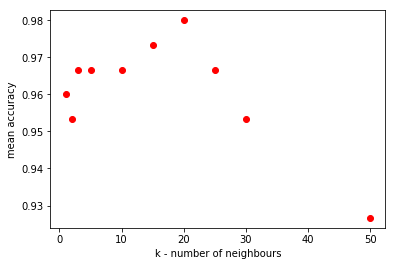

In [367]:
# plot nice graph
plt.plot(k_grid, results, 'ro')
plt.xlabel('k - number of neighbours')
plt.ylabel('mean accuracy')
plt.show()

In [365]:
np.max(results)

0.98000000000000009

$$\textbf{GridSearchCV estimator}$$

Exhaustive search over specified parameter values for an estimator.

In [358]:
# import gridsearchcv
from sklearn.model_selection import GridSearchCV

In [368]:
# implementation of searching for best k with k-neighbours
k_ngh = neighbors.KNeighborsClassifier()
parameters = {'n_neighbors':[1,2,3,5,10,15,20,25,30,50]}
grid_search_kngh = GridSearchCV(estimator=k_ngh, param_grid=parameters, cv=StratifiedKFold(10))

In [369]:
# evaluation with GridSearchCV
grid_search_kngh.fit(X, y)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
       error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 5, 10, 15, 20, 25, 30, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Find the best parameter k:

In [362]:
grid_search_kngh.best_params_

{'n_neighbors': 20}

In [363]:
grid_search_kngh.best_score_

0.97999999999999998

$$\textbf{Clustering (unsupervised learning)}$$

Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters).

Cluster analysis itself is not one specific algorithm, but the general task to be solved. It can be achieved by various algorithms that differ significantly in their notion of what constitutes a cluster and how to efficiently find them. 

In [250]:
# make some synthetic data and plots
from sklearn import datasets
import matplotlib.pyplot as plt

In [444]:
# create two blobs in 2Dim
X_0, y_0 = datasets.make_blobs(n_features=2, n_samples=100, centers=2, random_state=0)
X_1, y_1 = datasets.make_blobs(n_features=2, n_samples=100, centers=2, random_state=1)

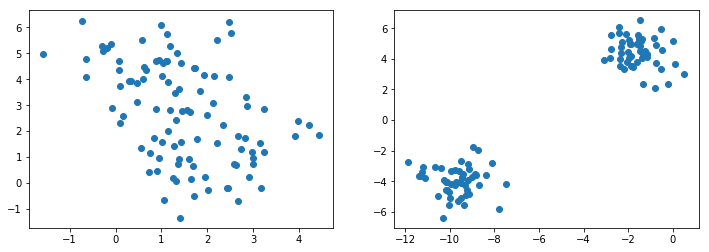

In [331]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.scatter(X_0[:,0], X_0[:,1])
plt.subplot(122)
plt.scatter(X_1[:,0], X_1[:,1])
plt.show()

$$\textbf{k-means}$$

The k-mean algorithm clusters data by trying to separate samples in _n_ groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares. This algorithm requires the number of clusters **to be specified**. 

In [332]:
# k-means algorithm 
from sklearn import cluster

In [333]:
# initialise k-means algorithm, the number of clusters MUST be prespecified
kmeans = cluster.KMeans(n_clusters=2)

In [469]:
# fit (import) the data
n_clusters = 2
km_0 = cluster.KMeans(n_clusters=n_clusters).fit(X_0)
km_1 = cluster.KMeans(n_clusters=n_clusters).fit(X_1)

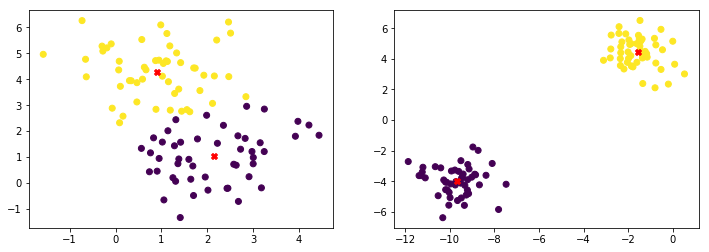

In [470]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.scatter(X_0[:,0], X_0[:,1], c=km_0.labels_)
plt.scatter(km_0.cluster_centers_[:,0], km_0.cluster_centers_[:,1], marker='X', c='r')
plt.subplot(122)
plt.scatter(X_1[:,0], X_1[:,1], c=km_1.labels_)
plt.scatter(km_1.cluster_centers_[:,0], km_1.cluster_centers_[:,1], marker='X', c='r')
plt.show()